See video on how to install tensorflow

# TensorFlow Outline & Comparison with sklearn
- Tensorflow uses both the CPU and GPU of the computer, this is crucial for the speed of the algorithm, as this means it can use more computing power
- sklearn is not as good as tensorflow when it comes to processing neural networks. Although in other ways sklearn is better, for things like k-means clustering and random forests. This is especially true for preprocessing

# Minimal Example wth Tensorflow
### Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

### Data Generation

In [2]:
obs = 1000
xs = np.random.uniform(-10, 10, (obs,1))
zs = np.random.uniform(-10, 10, (obs,1))

gen_inputs = np.column_stack((xs, zs))

noise = np.random.uniform(-1, 1, (obs,1))

gen_targets = 2*xs -3*zs +5 +noise

np.savez('TF_intro', inputs = gen_inputs, targets = gen_targets)

# Tensorflow doesn't like excel or csv files, it works better with 
# npz files which is what we have created above

# np.savez(file name, arrays) saves n-D arrays in .npz format
# using a label for each array. The file is saved in the same 
# folder as the notebook

### Solving with Tensorflow

In [3]:
training_data = np.load('TF_intro.npz')

In [4]:
# Creating the model

input_size = 2
output_size = 1

# When using tensorflow you must actually build the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(output_size,
                         kernel_initializer = tf.random_uniform_initializer(minval = -0.1, maxval = 0.1),
                          bias_initializer =  tf.random_uniform_initializer(minval = -0.1, maxval = 0.1)
                         )
])
# tf.keras.Sequential() is a function that specifies how the model 
# will be laid down

# tf.keras.layers.Dense(output size, kernel_initializer, bias_initializer) 
# takes the inputs provided to the model and calculates the dot 
# product of the inputs and the weights and adds the bias
# We can randomly initialise the weight(=kernel) and the bias


# Optimization Algorithm

custom_opt = tf.keras.optimizers.SGD(learning_rate=0.02)
# tf.keras.optimizers.SGD(learning rate) 

model.compile(optimizer = custom_opt, loss = 'mean_squared_error')
# model.compile(optimizer, loss) configures the model for training
# SGD = Stochastic Gradient Descent
# loss = 'mean_squared_error' = L2-norm
# loss = 'huber_loss' is good to use on a dataset with outliers


# Objective Function

model.fit(training_data['inputs'], training_data['targets'], epochs = 100, verbose=2)

# An epoch is an iteration over the full dataset
# verbose=0, stands for 'silent' or no output about the training is 
# displayed, =1 gives a progress bar, =2 gives a line for each epoch

Epoch 1/100
32/32 - 0s - loss: 26.9029 - 377ms/epoch - 12ms/step
Epoch 2/100
32/32 - 0s - loss: 1.1318 - 42ms/epoch - 1ms/step
Epoch 3/100
32/32 - 0s - loss: 0.4278 - 43ms/epoch - 1ms/step
Epoch 4/100
32/32 - 0s - loss: 0.4066 - 44ms/epoch - 1ms/step
Epoch 5/100
32/32 - 0s - loss: 0.3689 - 43ms/epoch - 1ms/step
Epoch 6/100
32/32 - 0s - loss: 0.3847 - 44ms/epoch - 1ms/step
Epoch 7/100
32/32 - 0s - loss: 0.3605 - 43ms/epoch - 1ms/step
Epoch 8/100
32/32 - 0s - loss: 0.3446 - 43ms/epoch - 1ms/step
Epoch 9/100
32/32 - 0s - loss: 0.3914 - 43ms/epoch - 1ms/step
Epoch 10/100
32/32 - 0s - loss: 0.3714 - 43ms/epoch - 1ms/step
Epoch 11/100
32/32 - 0s - loss: 0.3678 - 44ms/epoch - 1ms/step
Epoch 12/100
32/32 - 0s - loss: 0.3717 - 44ms/epoch - 1ms/step
Epoch 13/100
32/32 - 0s - loss: 0.3666 - 40ms/epoch - 1ms/step
Epoch 14/100
32/32 - 0s - loss: 0.3727 - 42ms/epoch - 1ms/step
Epoch 15/100
32/32 - 0s - loss: 0.3525 - 43ms/epoch - 1ms/step
Epoch 16/100
32/32 - 0s - loss: 0.3752 - 42ms/epoch - 1ms/ste

### Extract the weights and bias

In [5]:
model.layers[0].get_weights()
# model is the model we created
# then we must specify the layer we are interested in
# in this case it is the only layer our model has
# then we have to apply the method get_weights()

[array([[ 1.9855992],
        [-3.0318534]], dtype=float32),
 array([4.999801], dtype=float32)]

In [6]:
weights = model.layers[0].get_weights()[0]
weights

array([[ 1.9855992],
       [-3.0318534]], dtype=float32)

In [7]:
bias = model.layers[0].get_weights()[1]
bias

array([4.999801], dtype=float32)

### Extract the outputs (make predictions)

In [8]:
model.predict_on_batch(training_data['inputs']).round(1)
# model.predict_on_batch(data) calculates the outputs given inputs

array([[ 12.4],
       [ 29. ],
       [ -4. ],
       [  0.3],
       [ 22.2],
       [ 23.3],
       [ 10.6],
       [ 38.7],
       [ 47.1],
       [-35.5],
       [ 44.9],
       [ 45.9],
       [-18.7],
       [ 20.2],
       [  7.8],
       [ 12.8],
       [ 14.5],
       [ 41.6],
       [  4.4],
       [  2.3],
       [ 21.1],
       [ 14.3],
       [ 27.9],
       [ 11.7],
       [-23.2],
       [-20.4],
       [-26.5],
       [ 25.4],
       [-24.9],
       [  6.2],
       [ -3.1],
       [  8.9],
       [-17.7],
       [-10.8],
       [ 13.3],
       [ 27.6],
       [-17.6],
       [-19.8],
       [ 13.1],
       [  8.1],
       [ 29.7],
       [  8.9],
       [ 23.5],
       [-14.5],
       [ 16.7],
       [ -1.7],
       [ -0.2],
       [ 31.2],
       [ -9.7],
       [ 13.3],
       [ 14.5],
       [-30.2],
       [-18.2],
       [-18.2],
       [ 41. ],
       [-29.3],
       [ 36.1],
       [ 22. ],
       [-35.5],
       [ 37.2],
       [ 16.6],
       [ 11.1],
       [

In [9]:
training_data['targets'].round(1)

array([[ 13.4],
       [ 29.3],
       [ -3.9],
       [  0.1],
       [ 22.6],
       [ 22.9],
       [  9.5],
       [ 38.6],
       [ 46.2],
       [-34.9],
       [ 44.8],
       [ 46.1],
       [-18.3],
       [ 21. ],
       [  6.7],
       [ 13.2],
       [ 14.2],
       [ 40.9],
       [  5. ],
       [  3.2],
       [ 20.6],
       [ 13.4],
       [ 28.2],
       [ 11.5],
       [-23.6],
       [-20.2],
       [-26.2],
       [ 24.4],
       [-25.1],
       [  5.9],
       [ -3.6],
       [  9.3],
       [-17.3],
       [-11.2],
       [ 13.4],
       [ 27.3],
       [-16.8],
       [-19.5],
       [ 13.1],
       [  8.3],
       [ 30.5],
       [  9.5],
       [ 22.7],
       [-15.5],
       [ 16.1],
       [ -2.1],
       [ -0.4],
       [ 31.1],
       [-10.7],
       [ 12.9],
       [ 13.9],
       [-31.1],
       [-17.4],
       [-19.1],
       [ 40. ],
       [-29.2],
       [ 36.7],
       [ 21.6],
       [-34.6],
       [ 37.5],
       [ 17.7],
       [ 10.5],
       [

### Plotting the data

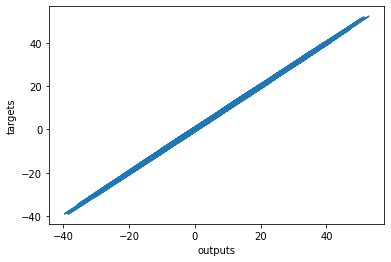

In [10]:
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])), np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()

# What is a Layer?
- The minimal example we did in Section 43, it had two inputs and one output, that was a type of neural network, but it had no depth.
- We used a linear model that learned a function, this function was the best fit of the data according to the L2-norm loss after a couple of hundered iterations.
- Real life is not linear, so to be better forecasters we will need to learn how to deal with more complex models
- Mixing linear functions and non-linearities allows us to model arbitrary functions
$$\text{Input} \rightarrow xw + b \rightarrow \text{Non-linearity} \rightarrow \text{Output}$$
- An example of non-linearity is the **sigmoid function** $\sigma(x) = \frac{1}{1+e^{-x}}$

**The linear combination and the additional non-linearity form a layer!** The layer is the building block of neural networks. When we have more than one layer we are talking about a deep neural network.

# What is a Deep Net?

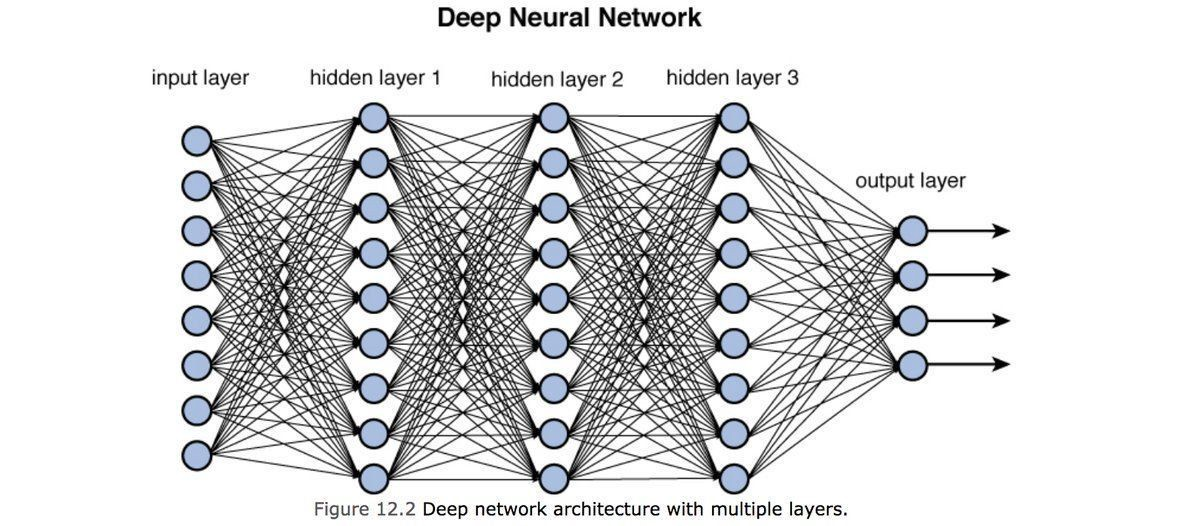

- Stacking layers produces a deep network or 'deep net'
- The building blocks of a hidden layer are called **hidden units** or **hidden nodes**
- The number of nodes in a layer is often referred to as the **width** of the layer. Usually, but not always, we stack layers of the same width so that the layer width is equal to the width of the entire network
- **Depth** refers to the number of layers in a network
- We refer to the width and depth of a network as **hyperparameters**

### Hyperparameters vs Parameters
- Hyperparameters are pre-set by us, e.g. width, depth, learning rate
- Parameters are found by optimizing, e.g. weights, biases

### Further Explanation
The first layer is the input, each node represents a separate input. Suppose we are trying to forecast the weather, imagine it has eight inputs. E.g. average temp, max temp, min temp, humidity, precipitation, atmospheric pressure, cloud cover, visibility.

Remember we combine these inputs linearly and then add non-linearity.  In this example the weights are an 8x9 matrix, as the inputs are a 1x8 vector and our first hidden layer is a 1x9 vector which is equal to x\*w + b + a non-linearity.

All the arrows get us from the input layer to the first hidden layer, each arrow represents the mathematical transformation of a certain value. In the weights matrix, the index of each weight refers to the input unit it is related to and the hidden unit it is related to.

To get the second hidden layer we repeat the process; we linearly combine the first hidden layer and then add a non-linearity. This time there are 9 units in the first hidden layer, and 9 units in the second hidden layer. The weights will be contained in a 9x9 matrix and there will be 81 arrows between nodes.

This process can continue for as long as you want. Finally we'll have the last hidden layer, when we apply the operation once again we will reach the output layer. The output units depends on the number of outputs we would like to have, in this layer there are 4. These could be temperature, precipitation, humidity, and atmospheric pressure for the next day. To reach this point we would have a 9x4 weight matrix, which means 36 arrows. 

As before, our optimization goal is finding values for weight matrices that would allow us to convert inputs into correct outputs, as best we can.

# Non-Linearities and their Purpose
Non-linearities are needed so we can break the linearity and represent more complicated relationships.

Stacking layers is the process of placing one layer after the other in a **meaningful way**. We cannot stack layers when we only have linear relationships.

Say we have a 1x8 input layer and a 1x9 hidden layer, meaning we have an 8x9 weights matrix ($w_1$) to get from the input layer (x) to the first hidden layer (h), so $h = x*w_1$. To get to the 1x4 output layer (y), we have a 9x4 weights matrix ($w_2$), so $y = h*w_2$, but we know $h = x*w_1$, so we get $y = x*w_1*w_2 \implies y = x*W$ which is a linear model, so the hidden layer is completely useless.

# Activation Functions
- In a machine learning context, non-linearities are called **activation functions**
- Activation functions transform inputs into outputs of a different kind
- Also called transfer functions

## Common Activation Functions

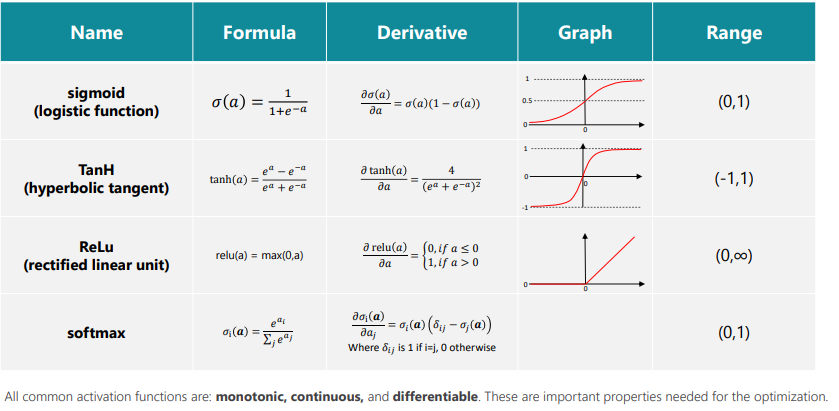

The softmax graph is not displayed as it is different every time.

## Softmax Activation
- The softmax activation transforms a bunch of arbitrarily large or small numbers into a valid probability distribution.
- While other activation functions get an input value and transform it, regardless of other elements, the softmax considers the information from ALL ELEMENTS.
- The values that softmax outputs are in the range from 0 to 1 and their sum is exactly 1 (like probabilities)

### Example
Say our input layer has 4 units, we have one hidden layer with 3 units and an output layer with 3 units. Let $\textbf{a} = xw + b$, then $y = \text{softmax}(\textbf{a})$.

Looking at the hidden layer we have that $\textbf{a}_h = hw + b$. After transforming it through a linear combination we get 
$$\textbf{a} = [-0.21, 0.47, 1.72]$$

Softmax is special. Each element in the output depends on the entire set of elements of the input.
$$y = \text{softmax}(\textbf{a}) = \frac{e^{a_i}}{\sum_j e^{a_j}}$$
$$\sum_j e^{a_j} = e^{-0.21} + e^{0.47} + e^{1.72} \approx 8$$
$$y = [0.1, 0.2, 0.7]$$

This is our output layer. This is the activation function used in the cat/dog/horse example. Softmax is often ised as the activation of the output layer in classification problems.

# Backpropagation
Recall we defined $\delta_i = y_i - t_i$ as the error between the outputs and targets. It is harder to define but we can have a $\delta_{i, h}$ which we find using backpropagation of errors. Having these deltas allows us to vary parameters with our update rule

### Forward propagation
- This is the process of pushing inputs through the net
- At the end of each epoch, the obtained outputs are compared to the targets to form the errors
- Then we backpropagate through partial derivatives and change each parameter so errors at the next epoch are minimized

# Picture Explanation

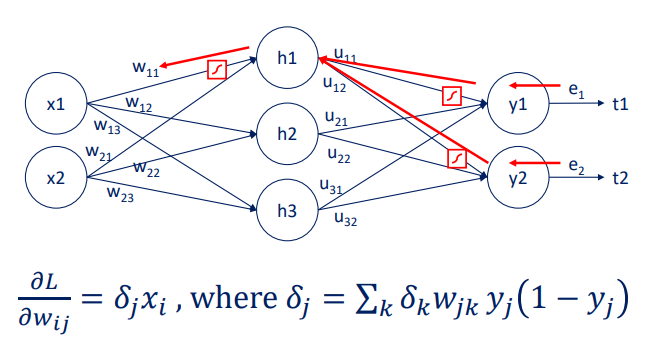

The weights from the inputs to the hidden layer are denoted by the w matrix, while the weights from the hidden layer to the outputs are denoted by the u matrix. The entries are shown above. It is very important to understand that the weights for each layer are different.

### U-errors
The error associated with $y_1$ is $e_1$ and the error associated with $y_2$ is $e_2$. Based on these errors we can adjust the U weights. Each $u_{ij}$ contributes to a single error. 

For example, $u_{11}$ contributes to the error $e_1$, then we find its gradient derivative $\left(u_{i+1} = u_i - \eta \nabla_u L(u_i)\right)$ and update the coefficient. 

### W-errors
Each $w_{ij}$ contributed to a h node, all 3 h nodes contribute to $y_1$ and $y_2$, thus contribute to $e_1$ and $e_2$.

For example $w_{11}$ helped us predict $h_1$, then we need $h_1$ to predict $y_1$ and $y_2$ thus it played a role in determining both errors. Since it influences both errors the adjustment rule for $w_{11}$ must be different.

The solution to this is to take the errors and backpropagate them through the net using the U weights. Knowing the U weights we can measure the contribution of each hidden unit to the respective errors. Then once we have found this contribution we can update the W weights.

Essentially through backpropagation the algorithm identifies which weights lead to which errors. Then it adjusts the weights that have a bigger contribution to the errors by more and the weights that have a smaller contribution to the errors by less.

### Activation Function
A big problem arises when we also consider the activation functions, they introduce additionally complexity to this process.